In [267]:
%load_ext autoreload
%autoreload 2
import sys
from tqdm import tqdm

import cv2
import numpy as np
from scipy import fft
from scipy.signal import convolve
from scipy.constants import pi

import matplotlib.pyplot as plt

import diffractsim as ds

sys.path.append("E:/Dropbox/py_projects/optics/src")
import fourierhelper as fo

mm_ = 1e-3
um_ = 1e-6
nm_ = 1e-9

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


#### Proof of principle superposition of fields 

---

In [66]:
U_WAVELENGTH = 1.510 * um_
U_WAVENUMBER = 2*np.pi / U_WAVELENGTH
U_PIXELPITCH = 6.0 * um_
U_SIZE_N = 2048
Z = 0.5

N_FFT_MIN = fo.FFTpts_required(U_SIZE_N, U_WAVELENGTH, U_PIXELPITCH)
print(N_FFT_MIN)

rowvec = U_PIXELPITCH * np.linspace( -U_SIZE_N//2, U_SIZE_N//2-1, U_SIZE_N, dtype=np.float64)
xx, yy =  np.meshgrid( rowvec, rowvec )
U_0_XWIDTH = U_PIXELPITCH * 40
U_0_YWIDTH = U_PIXELPITCH * 40

U_0_list = []
U_0_all = np.zeros_like(xx)
U_z_list = []
U_z_all = np.zeros_like(xx)
U_z_sum = np.zeros_like(xx)

# x_centers = U_0_XWIDTH * np.array([0.0, 3.0, 0.0, 3.0])
# y_centers = U_0_YWIDTH * np.array([0.0, 0.0, -3.0, -3.0])

ncentersx, ncentersy = 5, 5
x_centers, y_centers = np.meshgrid( np.linspace(-ncentersx//2, ncentersx//2, ncentersx), np.linspace(-ncentersy//2, ncentersy//2, ncentersy) )
x_centers = 5*U_0_XWIDTH * x_centers.reshape((-1, ))
y_centers = 5*U_0_YWIDTH * y_centers.reshape((-1, ))

print(x_centers)
for x0,y0 in zip(x_centers, y_centers):
    U_0 = fo.rect2d(xx, yy, x0, y0, U_0_XWIDTH, U_0_YWIDTH)
    U_0_list.append( U_0 )
    U_0_all = U_0_all + U_0
    
    U_z, A_0, A_z = fo.prop_angspect( U_0, Z, U_WAVELENGTH, U_PIXELPITCH )
    U_z_list.append( U_z )
    U_z_sum = U_z_sum + U_z

U_z_all, _, _ = fo.prop_angspect( U_0_all, Z, U_WAVELENGTH, U_PIXELPITCH )
    

516
[-0.0036 -0.0021 -0.0006  0.0009  0.0024 -0.0036 -0.0021 -0.0006  0.0009
  0.0024 -0.0036 -0.0021 -0.0006  0.0009  0.0024 -0.0036 -0.0021 -0.0006
  0.0009  0.0024 -0.0036 -0.0021 -0.0006  0.0009  0.0024]


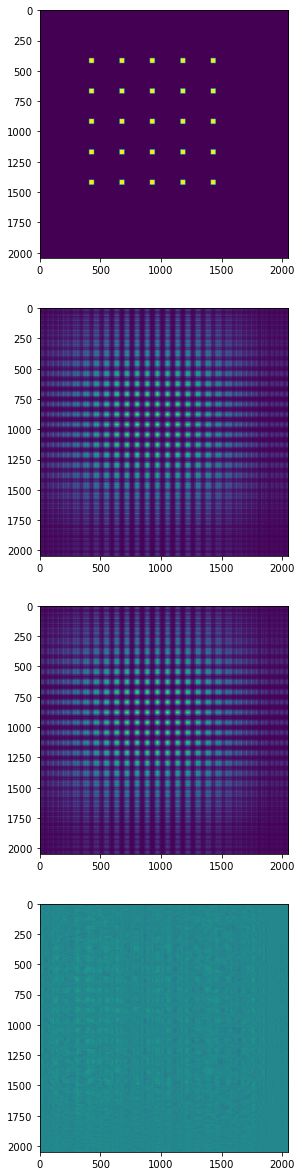

In [69]:


fig, (ax_u0, ax_uz, ax_uzsum, ax_uzdiff) = plt.subplots(4,1, figsize=(20,21))

ax_u0.imshow(np.abs(U_0_all))

ax_uz.imshow( np.abs(U_z_all) )
ax_uzsum.imshow( np.abs(U_z_sum) )
ax_uzdiff.imshow( np.abs(U_z_all) - np.abs(U_z_sum) )
plt.show()

#### Array of emitters

---

In [260]:
U_WAVELENGTH = 532 * nm_
U_WAVENUMBER = 2*np.pi / U_WAVELENGTH
U_PIXELPITCH = 6.0 * um_
U_SIZE_N = 2048
Z = 0.5

N_FFT_MIN = fo.FFTpts_required(U_SIZE_N, U_WAVELENGTH, U_PIXELPITCH)
print(N_FFT_MIN)

rowvec = U_PIXELPITCH * np.linspace( -U_SIZE_N//2, U_SIZE_N//2-1, U_SIZE_N, dtype=np.float64)
xx, yy =  np.meshgrid( rowvec, rowvec )
U_0_XWIDTH = U_PIXELPITCH * 50
U_0_YWIDTH = U_PIXELPITCH * 50

U_0_list = []
U_0_all = np.zeros_like(xx)

# x_centers = U_0_XWIDTH * np.array([0.0, 3.0, 0.0, 3.0])
# y_centers = U_0_YWIDTH * np.array([0.0, 0.0, -3.0, -3.0])

ncentersx, ncentersy = 5, 5
x_centers, y_centers = np.meshgrid( np.linspace(-ncentersx//2, ncentersx//2, ncentersx), np.linspace(-ncentersy//2, ncentersy//2, ncentersy) )
x_centers = 1*U_0_XWIDTH * x_centers.reshape((-1, ))
y_centers = 1*U_0_YWIDTH * y_centers.reshape((-1, ))

print(x_centers)
for x0,y0 in zip(x_centers, y_centers):
    U_0 = fo.rect2d(xx, yy, x0, y0, U_0_XWIDTH, U_0_YWIDTH)
    U_0_list.append( U_0 )
    U_0_all = U_0_all + U_0
    
U_z_all, _, _ = fo.prop_angspect( U_0_all, Z, U_WAVELENGTH, U_PIXELPITCH )
    

182
[-0.0009   -0.000525 -0.00015   0.000225  0.0006   -0.0009   -0.000525
 -0.00015   0.000225  0.0006   -0.0009   -0.000525 -0.00015   0.000225
  0.0006   -0.0009   -0.000525 -0.00015   0.000225  0.0006   -0.0009
 -0.000525 -0.00015   0.000225  0.0006  ]


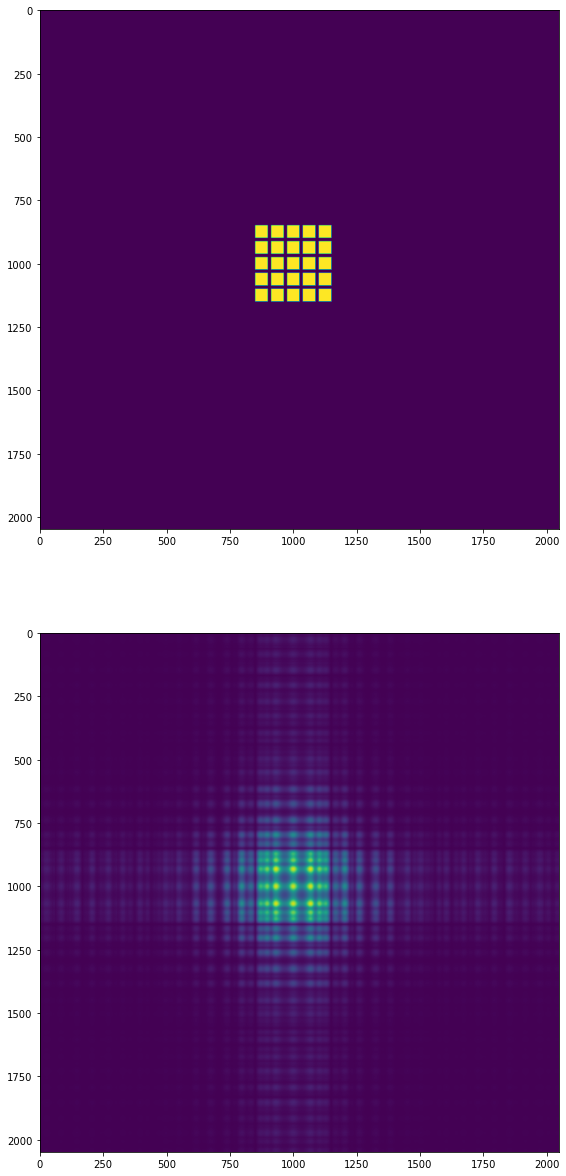

In [261]:

fig, (ax_u0, ax_uz ) = plt.subplots(2,1, figsize=(20,21))

ax_u0.imshow(np.abs(U_0_all))

ax_uz.imshow( np.abs(U_z_all) )

plt.show()

In [238]:
U_WAVELENGTH = 1515 * nm_
U_WAVENUMBER = 2*np.pi / U_WAVELENGTH
U_PIXELPITCH = 6.0 * um_
U_SIZE_N = 2048
Z = 0.5

N_FFT_MIN = fo.FFTpts_required(U_SIZE_N, U_WAVELENGTH, U_PIXELPITCH)
print(N_FFT_MIN)

rowvec = U_PIXELPITCH * np.linspace( -U_SIZE_N//2, U_SIZE_N//2-1, U_SIZE_N, dtype=np.float64)
xx, yy =  np.meshgrid( rowvec, rowvec )
U_0_XWIDTH = U_PIXELPITCH * 40
U_0_YWIDTH = U_PIXELPITCH * 40

U_0_list = []
U_0_all = np.zeros_like(xx)

# x_centers = U_0_XWIDTH * np.array([0.0, 3.0, 0.0, 3.0])
# y_centers = U_0_YWIDTH * np.array([0.0, 0.0, -3.0, -3.0])

ncentersx, ncentersy = 5, 5
rng = np.random.default_rng(seed=230123)
x_centers = (rng.random(ncentersx*ncentersy) - 0.5)
x_centers = 1*mm_ * ncentersx * x_centers
y_centers = (rng.random(ncentersx*ncentersy) - 0.5)
y_centers = 1*mm_ * ncentersy * y_centers

print(x_centers)
for x0,y0 in zip(x_centers, y_centers):
    U_0 = fo.rect2d(xx, yy, x0, y0, U_0_XWIDTH, U_0_YWIDTH)
    U_0_list.append( U_0 )
    U_0_all = U_0_all + U_0
    
U_z_all, _, _ = fo.prop_angspect( U_0_all, Z, U_WAVELENGTH, U_PIXELPITCH )
    

518
[-1.58201945e-03 -1.51244391e-04  7.32301213e-04  1.90923010e-03
  2.05179174e-03  3.55313174e-04  1.22633141e-03 -1.49536174e-03
 -7.97228760e-04  7.76681071e-04 -1.15947167e-03 -1.50776593e-03
  4.94290081e-05  2.13361714e-03  1.47290786e-03 -2.44842180e-03
  5.65735197e-04  1.65492367e-03 -2.34843543e-03 -2.03668265e-03
  4.94023684e-04 -1.07747354e-03  6.69170299e-05  2.25251849e-03
 -2.27547825e-03]


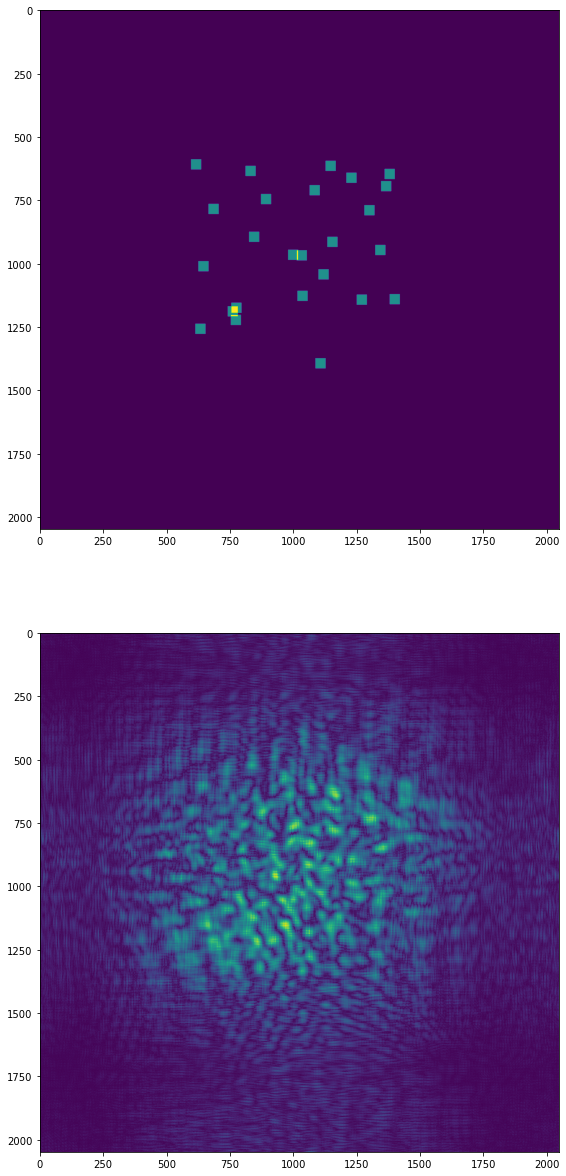

In [255]:

fig, (ax_u0, ax_uz ) = plt.subplots(2,1, figsize=(20,21))

ax_u0.imshow(np.abs(U_0_all))

ax_uz.imshow( np.abs(U_z_all) )

plt.show()

In [240]:
F = ds.MonochromaticField(U_WAVELENGTH, U_PIXELPITCH*U_SIZE_N, U_PIXELPITCH*U_SIZE_N, U_SIZE_N, U_SIZE_N )

F.E = U_0_all
Z = 1.0
# F.propagate(Z)
ccd_size = 0.05
F.zoom_propagate(Z, x_interval=[-ccd_size, ccd_size], y_interval=[-ccd_size, ccd_size])

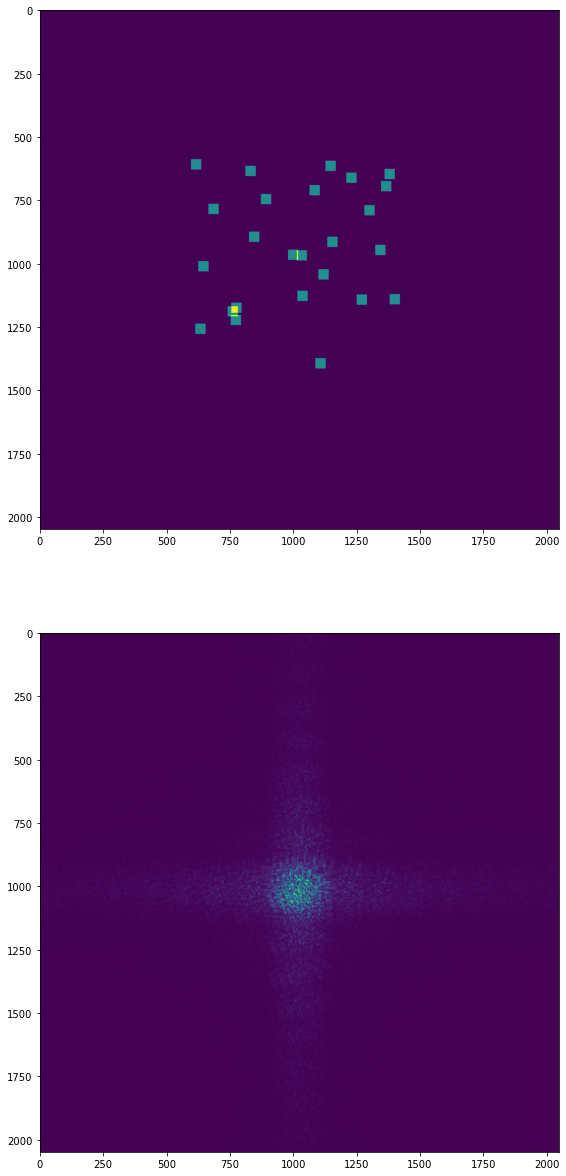

In [241]:
fig, (ax_u0, ax_uz ) = plt.subplots(2,1, figsize=(20,21))

ax_u0.imshow(np.abs(U_0_all))

ax_uz.imshow( np.abs(F.E) )

plt.show()

#### Convolution

---

In [269]:
U_WAVELENGTH = 1515 * nm_
U_WAVENUMBER = 2*np.pi / U_WAVELENGTH
U_PIXELPITCH = 6.0 * um_
U_SIZE_N = 2048
DIST_PROPAGATE = 0.5

# N_FFT_MIN = fo.FFTpts_required(U_SIZE_N, U_WAVELENGTH, U_PIXELPITCH)
# print(N_FFT_MIN)

rowvec = U_PIXELPITCH * np.linspace( -U_SIZE_N//2, U_SIZE_N//2-1, U_SIZE_N, dtype=np.float64)
xx, yy =  np.meshgrid( rowvec, rowvec )
U_0_XWIDTH = 6.0 * um_
U_0_YWIDTH = 11.0 * um_

# init monochromatic sim
F = ds.MonochromaticField(U_WAVELENGTH, U_PIXELPITCH*U_SIZE_N, U_PIXELPITCH*U_SIZE_N, U_SIZE_N, U_SIZE_N )
# make initial field
U_0 = fo.rect2d(xx, yy, 0.0, 0.0, U_0_XWIDTH, U_0_YWIDTH)
F.E = U_0.copy()

# F.propagate(Z)
# ccd_size_x, ccd_size_y = 0.1, 0.1
ccd_size_x, ccd_size_y = U_SIZE_N*U_PIXELPITCH, U_SIZE_N*U_PIXELPITCH
F.zoom_propagate(DIST_PROPAGATE, x_interval=[-ccd_size_x/2, ccd_size_x/2], y_interval=[-ccd_size_y/2, ccd_size_y/2])
U_z = F.E.copy() # diffraction of initial field

# CCD meshgrid i.e. output screen 
xvec = np.linspace(-ccd_size_x/2, ccd_size_x/2, U_SIZE_N)
yvec = np.linspace(-ccd_size_y/2, ccd_size_y/2, U_SIZE_N)
ccd_xx, ccd_yy = np.meshgrid( xvec, yvec )

# Make array

# x_centers = U_0_XWIDTH * np.array([0.0, 3.0, 0.0, 3.0])
# y_centers = U_0_YWIDTH * np.array([0.0, 0.0, -3.0, -3.0])

ARRAY_SPACING_X = 100 * um_
ARRAY_SPACING_Y = 100 * um_
ncentersx, ncentersy = 5, 5
ARRAY_SPAN_X = ARRAY_SPACING_X * ncentersx
ARRAY_SPAN_Y = ARRAY_SPACING_Y * ncentersy

x_centers, y_centers = np.meshgrid( np.linspace(-ncentersx//2, ncentersx//2, ncentersx), np.linspace(-ncentersy//2, ncentersy//2, ncentersy) )
x_centers = ARRAY_SPACING_X * x_centers.reshape((-1, ))
y_centers = ARRAY_SPACING_Y * y_centers.reshape((-1, ))

# rng = np.random.default_rng(seed=230123)
# x_centers = ARRAY_SPAN_X*(rng.random(ncentersx*ncentersy) - 0.5)
# y_centers = ARRAY_SPAN_Y*(rng.random(ncentersx*ncentersy) - 0.5)

form_array = np.zeros_like( ccd_xx )
for x0,y0 in tqdm(zip(x_centers, y_centers)):
    form_array = form_array + fo.deltafunc_2d( ccd_xx, ccd_yy, x0, y0 )
    # form_array = form_array + fo.rect2d( ccd_xx, ccd_yy, x0, y0, U_0_XWIDTH, U_0_YWIDTH )


U_z_conv = convolve( U_z, form_array, mode='same', method='auto')

print(x_centers)
print( ccd_xx[0])
print(y_centers)
print( ccd_yy[:,0])
print(form_array.max())

25it [00:08,  2.99it/s]


[-3.00e-04 -1.75e-04 -5.00e-05  7.50e-05  2.00e-04 -3.00e-04 -1.75e-04
 -5.00e-05  7.50e-05  2.00e-04 -3.00e-04 -1.75e-04 -5.00e-05  7.50e-05
  2.00e-04 -3.00e-04 -1.75e-04 -5.00e-05  7.50e-05  2.00e-04 -3.00e-04
 -1.75e-04 -5.00e-05  7.50e-05  2.00e-04]
[-0.006144   -0.006138   -0.00613199 ...  0.00613199  0.006138
  0.006144  ]
[-3.00e-04 -3.00e-04 -3.00e-04 -3.00e-04 -3.00e-04 -1.75e-04 -1.75e-04
 -1.75e-04 -1.75e-04 -1.75e-04 -5.00e-05 -5.00e-05 -5.00e-05 -5.00e-05
 -5.00e-05  7.50e-05  7.50e-05  7.50e-05  7.50e-05  7.50e-05  2.00e-04
  2.00e-04  2.00e-04  2.00e-04  2.00e-04]
[-0.006144   -0.006138   -0.00613199 ...  0.00613199  0.006138
  0.006144  ]
1.0


In [272]:

form_array = np.zeros_like( ccd_xx )
for x0,y0 in tqdm(zip(x_centers, y_centers)):
    # form_array = form_array + fo.deltafunc_2d( ccd_xx, ccd_yy, x0, y0 )
    form_array = form_array + fo.rect2d( ccd_xx, ccd_yy, x0, y0, U_0_XWIDTH, U_0_YWIDTH )


25it [00:00, 26.81it/s]


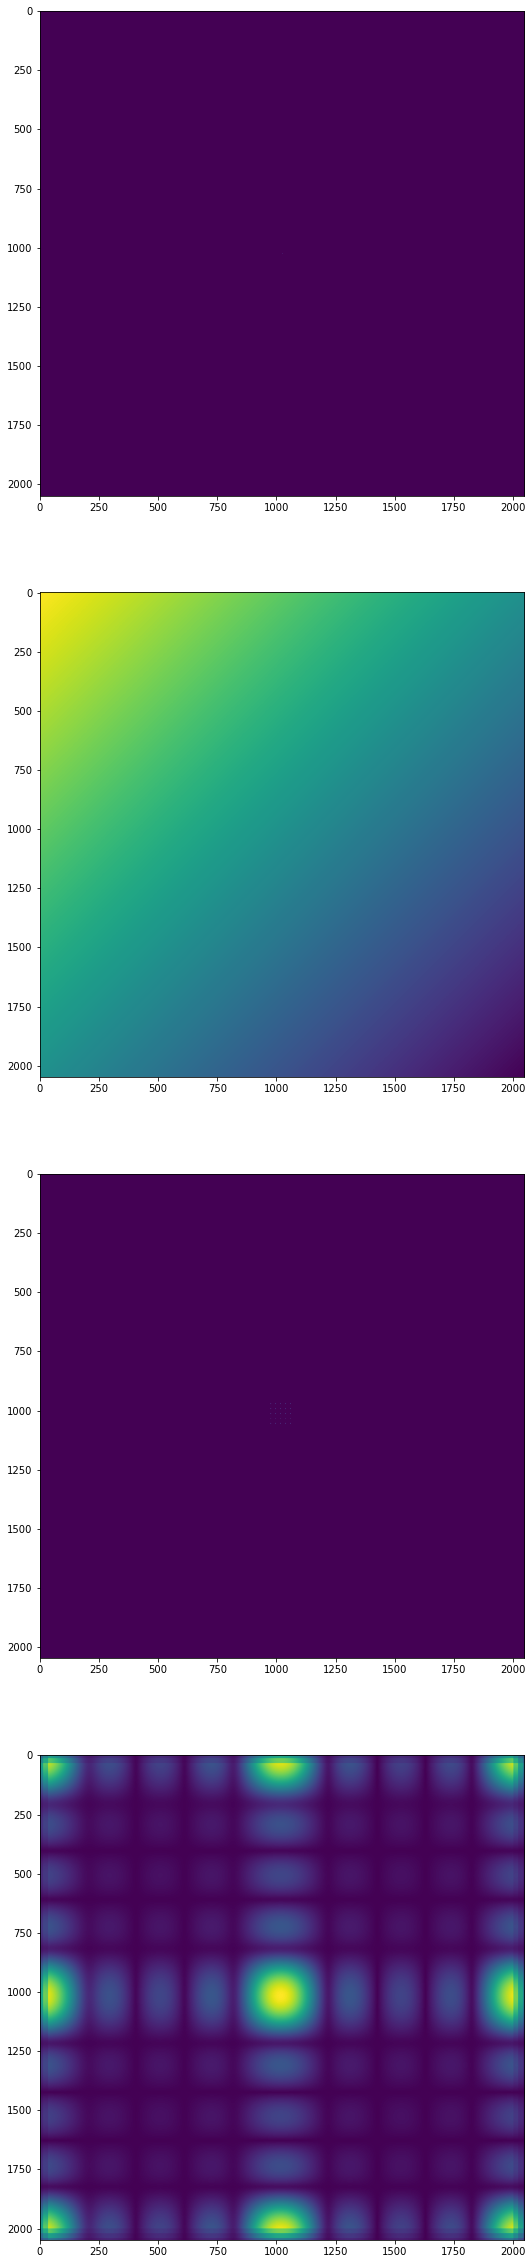

In [273]:
fig, (ax_u0, ax_uz, ax_arr, ax_conv ) = plt.subplots(4,1, figsize=(10,41))

ax_u0.imshow(np.abs(U_0))

ax_uz.imshow( np.abs( U_z ) )

ax_arr.imshow( np.abs(form_array ) )

ax_conv.imshow( np.abs(U_z_conv) )

plt.show()
    

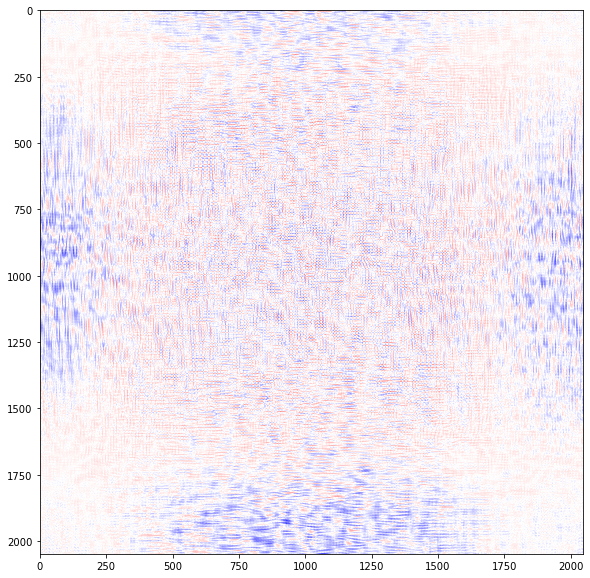

In [257]:
fig, ax = plt.subplots(1,1,figsize=[10,10])
ax.imshow( np.abs(U_z_conv) - np.abs(U_z_all) , cmap='bwr')

plt.show()

In [259]:
np.max(np.abs(U_z_conv) - np.abs(U_z_all) ) / np.max( np.abs(U_z_all) )

0.20636973823104

In [186]:
U_SIZE_N = 8
rowvec = -0.3 + np.linspace( -U_SIZE_N//2, U_SIZE_N//2-1, U_SIZE_N, dtype=np.float64)
xx, yy =  np.meshgrid( rowvec, rowvec )

delta_x = xx[0,1] - xx[0,0]

print(xx//delta_x)
zz = fo.deltafunc_2d( xx, yy, 0.3, 0.4)

print(zz)


[[-5. -4. -3. -2. -1.  0.  1.  2.]
 [-5. -4. -3. -2. -1.  0.  1.  2.]
 [-5. -4. -3. -2. -1.  0.  1.  2.]
 [-5. -4. -3. -2. -1.  0.  1.  2.]
 [-5. -4. -3. -2. -1.  0.  1.  2.]
 [-5. -4. -3. -2. -1.  0.  1.  2.]
 [-5. -4. -3. -2. -1.  0.  1.  2.]
 [-5. -4. -3. -2. -1.  0.  1.  2.]]
[[0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0.]]


In [115]:
xx - 1.3//(xx[0,1]-xx[0,0])

array([[-5., -4., -3., -2., -1.,  0.,  1.,  2.],
       [-5., -4., -3., -2., -1.,  0.,  1.,  2.],
       [-5., -4., -3., -2., -1.,  0.,  1.,  2.],
       [-5., -4., -3., -2., -1.,  0.,  1.,  2.],
       [-5., -4., -3., -2., -1.,  0.,  1.,  2.],
       [-5., -4., -3., -2., -1.,  0.,  1.,  2.],
       [-5., -4., -3., -2., -1.,  0.,  1.,  2.],
       [-5., -4., -3., -2., -1.,  0.,  1.,  2.]])